### Instructions:

    1. Submit your python notebooks in zip format with naming convention as:
        
            RollNo1_RollNo2_RollNo3.zip
            
    2. Cheating of any form will not be tolerated.

Fill your Team details here.<br>
<br>
Format: Roll Number
 
         1. MT2019109
         2. MT2019110
         3. MT2019118

# Problem statement is to predict price column based on data with 24 Columns with over 200 data entries using Linear Regression.

In [63]:
#import required libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [33]:
#Read data("Data.csv") into dataframe

#read df in X
X= pd.read_csv("Data.csv")
df= pd.read_csv("Data.csv")
#Copy Target(column to be predicted) in Y
Y= X.iloc[:,25:] 
#drop target from X, now X is input data
X = X.iloc[:,:24]
X


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16


In [9]:
#Check for null values in X and Y
Y.isnull().sum()
X.isnull().sum()

#what did you observe?
#ans:- NO NULL VALUES

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
dtype: int64

In [52]:
#Check if scaling and encoding are required in X

X.info()
#is it required or not?
#ans:- YES


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

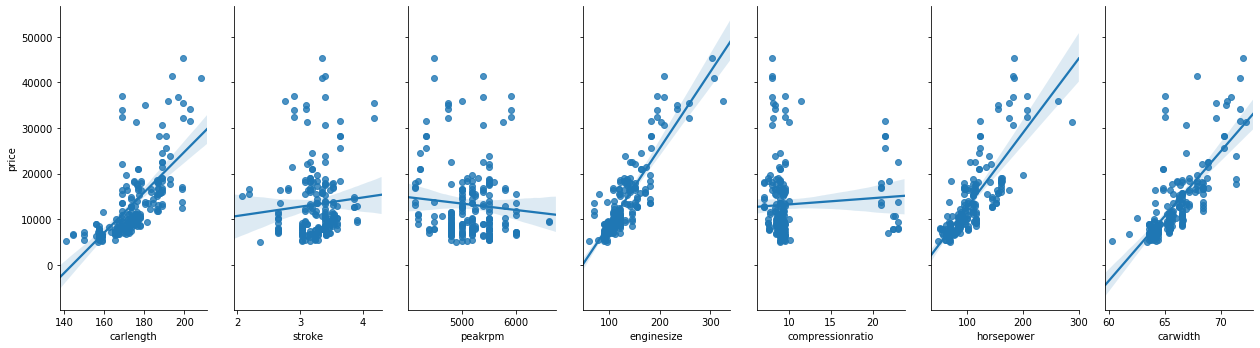

In [44]:
#Plot relationships between the target variable and any 7 features using pair plot,scatter plot,matrix heatmap
import seaborn as sns

%matplotlib inline
sns.pairplot(df, x_vars=['carlength', 'stroke','peakrpm','enginesize','compressionratio','horsepower','carwidth'],y_vars='price' , size=5, aspect=0.5, kind='reg')
#What did you observe?
#ans:-

In [65]:
sns.scatterplot(X, Y, x_vars=['carlength', 'stroke','peakrpm','enginesize','compressionratio','horsepower','carwidth'],y_vars='price' , size=5, aspect=0.5, kind='reg')


ValueError: If using all scalar values, you must pass an index

In [ ]:
cleanup_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
X.replace(cleanup_nums, inplace=True)


Cat=X.select_dtypes(include=['object']).copy(deep='False')


Cat=Cat.iloc[:, :].apply(pd.Series)
Name=Cat.CarName.copy()


Temp=[]
Temp=Name.str.split(pat=" ",expand=True)
Temp=Temp[0]
X.CarName=Temp
Cat.CarName=Temp


cleanup_nums = {"CarName":     { "maxda": "mazda" , "porcshce": "porsche" , "Nissan":"nissan" , "vokswagen":"volkswagen", "toyouta" : "toyota","vw" : "volkswagen"} }
X.replace(cleanup_nums, inplace=True)

In [51]:
#check if One hot encoding is required? if yes do it.
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(X)
one_hot_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Scale the Dataset



In [58]:
X.info()
X = X.drop(['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation', 'enginetype','cylindernumber','fuelsystem'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [60]:
#Splitting data into test and train - 30% Test and 70% Train

from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(X,Y, test_size = 0.3,random_state=8)

In [61]:
#Find correlation coeff using linear regression.

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# Print The coefficients
print(linreg.coef_)
#What did you observe looking at the coeffients, Describe your observation in atleast 30 words?
#ans:-

[[-1.93008999e+01  4.36870703e+02  1.28886470e+02  2.72292273e+01
   2.50274951e+02  1.54020084e+02  1.92377685e+00  9.53186089e+01
   6.17179059e+02 -3.29326677e+03  2.78594913e+02  4.65538634e+01
   1.81934157e+00  3.09732675e+01]]
